# <font color = "Green">  Big mart Sales</font>

# <font color = "purple"> Description of Big mart Sales</font>

The "Big Mart Sales" dataset on Kaggle provides sales data for a fictional chain of grocery stores called "BigMart" during the years 2013 and 2014. The dataset includes information about 1,550 different products sold across 10 different stores.

- The dataset contains two CSV files: "Train.csv" and "Test.csv".
- The "Train.csv" file contains data for training machine learning models, 
- while the "Test.csv" file is used to evaluate the performance of the models.

- The goal of the Big Mart Sales dataset is to predict the sales of each product in each store. 
- This is a common problem in the - retail industry, 
  where accurate sales predictions can help companies optimize inventory management and improve profitability.
  
  
 

    1.Item_Weight: The weight of the product.

    2.Item_Fat_Content: Whether the product is low fat or regular.

    3.Item_Visibility: The percentage of total display area of all products in a store devoted to the particular product.

    4.Item_Type: The category of the product.

    5.Item_MRP: The Maximum Retail Price (MRP) of the product.

    6.Outlet_Identifier: A unique identifier for each store.

    7.Outlet_Establishment_Year: The year in which the store was established.

    8.Outlet_Size: The size of the store in terms of ground area covered.

    9.Outlet_Location_Type: The type of city in which the store is located.

    10.Outlet_Type: Whether the store is a grocery store or a supermarket.

    11.Item_Outlet_Sales: The sales of the product in the particular store. This is the target variable that needs to be predicted.
    
    12.Item_Identifier: A unique identifier for each product.

# <font color = "pale yellow">Algorithms those can apply</font>

There are several algorithms that can be used to build a predictive model to understand the factors that affect sales in Big Mart. Some of the commonly used algorithms are:

- **Linear Regression:** This algorithm is used to build a model that shows the relationship between the target variable (sales)    and the independent variables (product or store characteristics).
<br>

- **Decision Tree**: This algorithm is used to build a model that can identify the most important variables that affect sales by recursively splitting the data based on the variables that provide the most information gain.
<br>


- **Random Forest**: This algorithm is an ensemble method that combines multiple decision trees to build a more accurate and robust model.
<br>


- **Support Vector Machines (SVM)**: This algorithm is used to build a model that can classify data into different categories based on the independent variables.
<br>


- **Neural Networks**: This algorithm is used to build a model that simulates the structure and function of the human brain and can learn complex relationships between variables.

The choice of algorithm depends on the nature of the data, the complexity of the problem, and the accuracy and interpretability of the results required.

### formulas for the sales forcast :  https://www.shopify.com/blog/sales-forecasts

# <font color = "pale yellow">Algorithms those I used </font>
- **Linear Regression:** 
- **Random Forest**:    

In [1]:
from sklearn.linear_model import LinearRegression, Lasso

In [2]:
import statsmodels
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# pip install --upgrade scikit-learn
# from sklearn.impute import IterativeImputer

In [4]:

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




In [5]:
## linear regression model
from sklearn.linear_model import LinearRegression, Lasso

#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#cross-validation
from sklearn.model_selection import cross_val_score


In [6]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# <font color = 'green'>Exploratory Data Analysis</font>

In [9]:
#chcking duplicates
print(train.duplicated().value_counts())
print(test.duplicated().value_counts())

False    8523
dtype: int64
False    5681
dtype: int64


In [10]:
#shape
train.shape

(8523, 12)

In [11]:
test.shape

(5681, 11)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [14]:
train.describe(include='object') # we can use 'O'

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


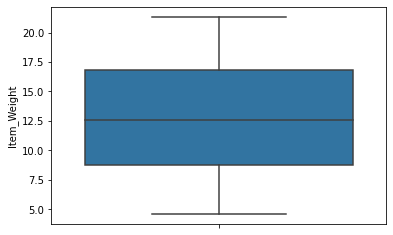

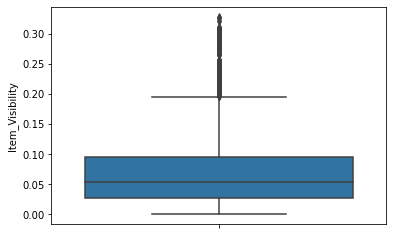

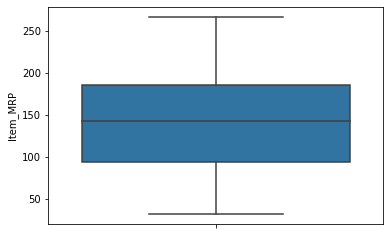

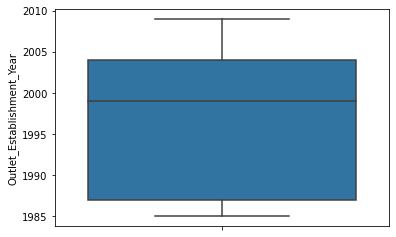

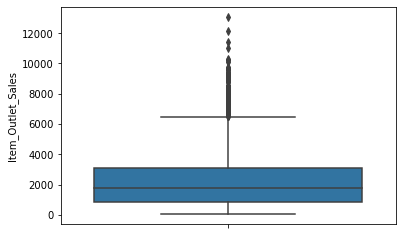

In [15]:
# outlier detection
for plot in train.select_dtypes(exclude= "O"):
    sns.boxplot(y = train[plot])
    plt.show()



<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

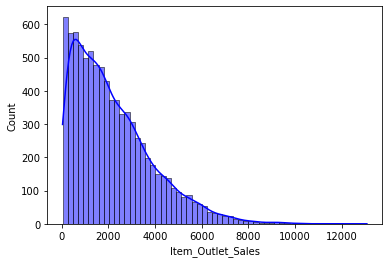

In [16]:
sns.histplot(train['Item_Outlet_Sales'], kde=True, color="blue",)

In [17]:
train.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


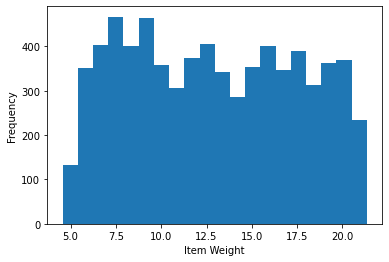

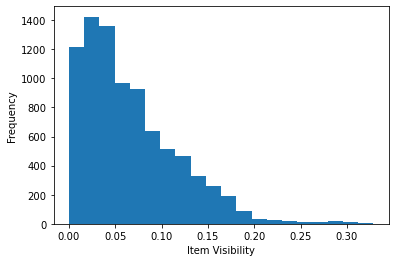

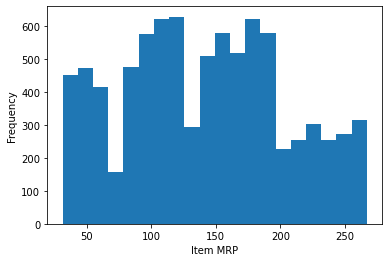

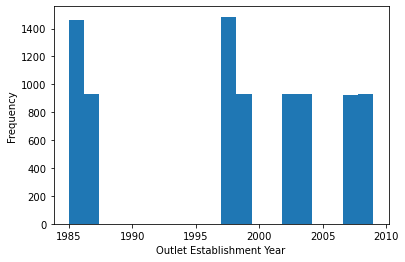

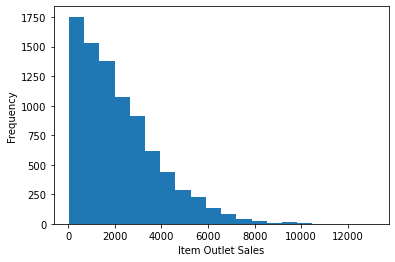

In [18]:

plt.hist(train['Item_Weight'], bins=20)
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

plt.hist(train['Item_Visibility'], bins=20)
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.show()

plt.hist(train['Item_MRP'], bins=20)
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()

plt.hist(train['Outlet_Establishment_Year'], bins=20)
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Frequency')
plt.show()

plt.hist(train['Item_Outlet_Sales'], bins=20)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

In [19]:
train[train['Outlet_Size'].isnull()== True]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [20]:
train[train["Outlet_Size"].isnull() ==True]['Outlet_Location_Type'].value_counts()

Tier 2    1855
Tier 3     555
Name: Outlet_Location_Type, dtype: int64

In [21]:
train[train["Outlet_Size"].isnull() ==True]['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [22]:
train[train["Outlet_Size"].isnull() ==True]['Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [23]:
train[(train["Outlet_Location_Type"] =="Tier 2" ) & (train["Outlet_Type"] =="Supermarket Type1")]['Outlet_Size'].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

In [24]:
train[(train['Outlet_Size'].isnull() ==True)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [25]:
train[(train["Outlet_Location_Type"] =="Tier 3" ) & (train["Outlet_Type"] =="Grocery Store")]['Outlet_Size'].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

In [26]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [27]:
train[train["Outlet_Type"] == "Grocery Store"]['Outlet_Size'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

In [28]:
train[(train['Outlet_Location_Type'] == "Tier 3") ]['Outlet_Size'].value_counts()

Medium    1863
High       932
Name: Outlet_Size, dtype: int64

based on the 2 previuos commands, it appears that every "Grocery store" in the dataframe is "Small" size¶
however that, the size of "Tier 3" always medium or high

    so i will assume that it's medium since it's the mode value before the last editing that we made on the previous nulls



In [29]:
train.loc[(train['Outlet_Size'].isnull() ==True) &(train['Outlet_Identifier'] != 'OUT010'),"Outlet_Size"] = "Small"


## for other outlets identifier they will be "Medium"
train.loc[(train['Outlet_Size'].isnull() ==True) &(train['Outlet_Identifier'] == 'OUT010'),"Outlet_Size"] = "Medium"

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

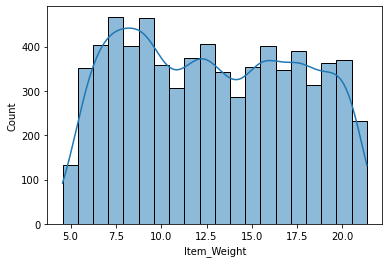

In [30]:
sns.histplot(train['Item_Weight'],kde=True)

In [31]:
train[train['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [32]:
imputer = SimpleImputer()
Item_Weight = imputer.fit_transform(train['Item_Weight'].values.reshape(-1,1))

<AxesSubplot:ylabel='Count'>

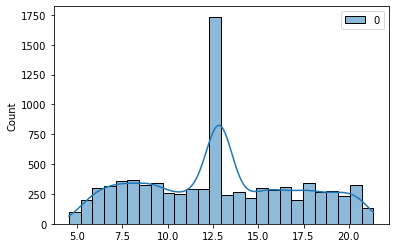

In [33]:


sns.histplot(Item_Weight,kde=True)



In [73]:


### tryin another approach for handling missing in item weights
cols = ['Item_Visibility','Item_MRP','Item_Weight']
x = train[cols]

impute_it = IterativeImputer()
x = impute_it.fit_transform(x)



<AxesSubplot:ylabel='Count'>

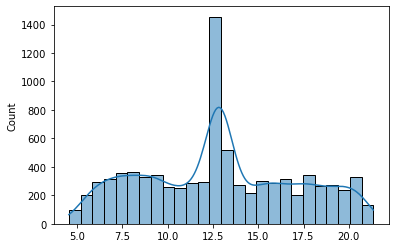

In [74]:
sns.histplot(x[:,2],kde=True)

In [34]:
train.loc[train['Item_Visibility']==0, 'Item_Visibility'] = train['Item_Visibility'].mean()

In [75]:


## so we will go wtih the second approach
train['Item_Weight'] = x[:,2]
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet_Age                 8523 non-null   int64  
dtypes: float64(4), int32(6), int64(2), object(1)
mem

In [77]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,156,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,20
1,8,5.92,1,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,10
2,662,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,20
3,1121,19.20,1,0.066132,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,21
4,1297,8.93,0,0.066132,Household,53.8614,1,1987,0,2,1,994.7052,32


In [36]:
train['Outlet_Age'] = 2019 - train['Outlet_Establishment_Year']
train['Outlet_Age']

0       20
1       10
2       20
3       21
4       32
        ..
8518    32
8519    17
8520    15
8521    10
8522    22
Name: Outlet_Age, Length: 8523, dtype: int64

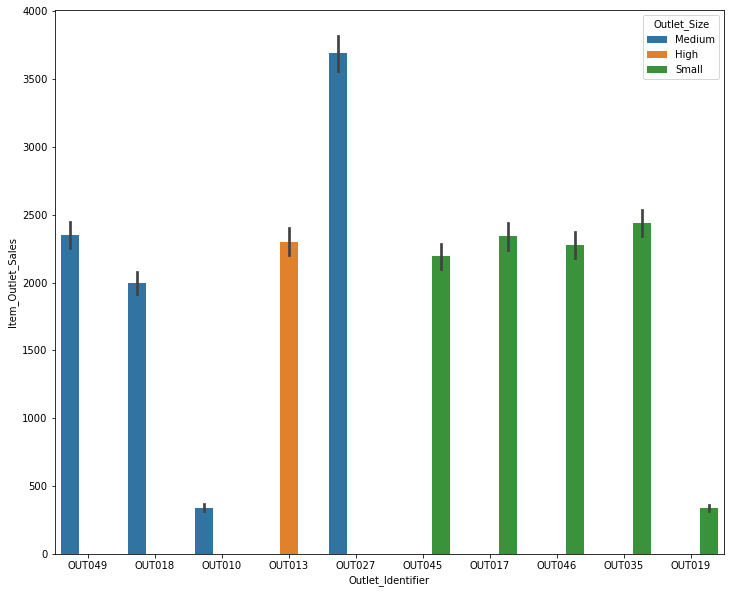

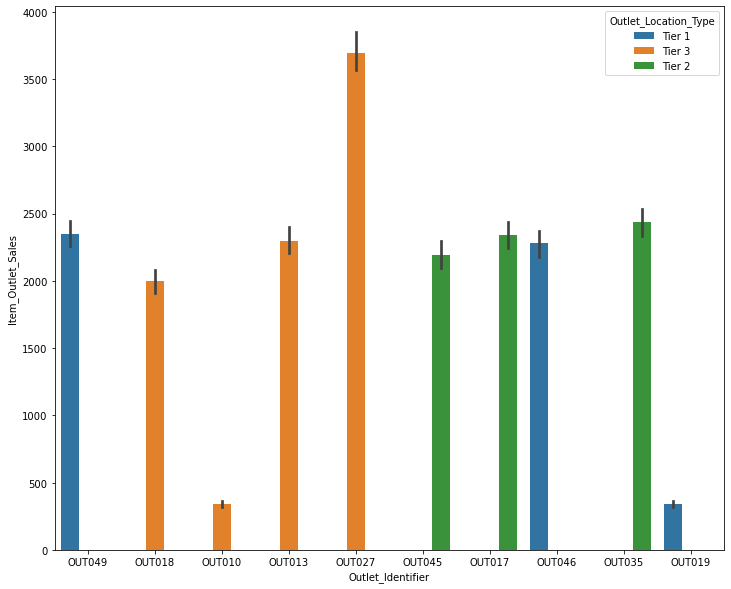

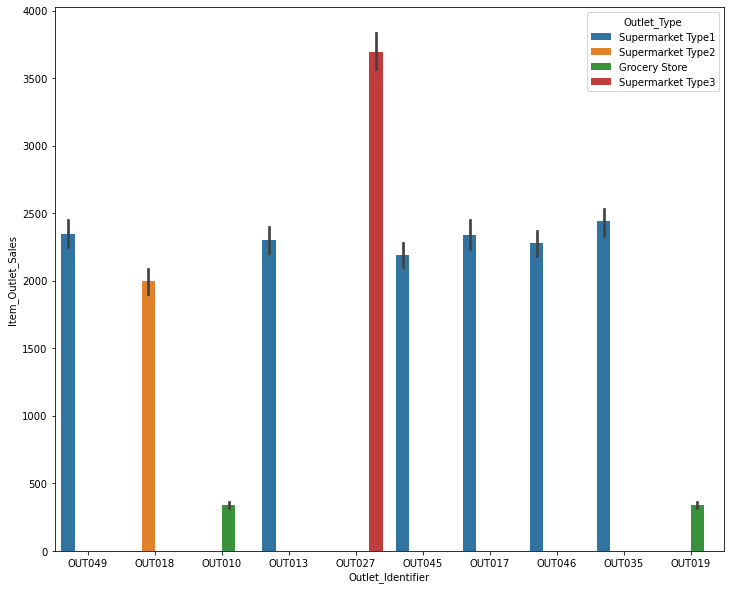

In [37]:
outlet_cols = ['Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
for i in outlet_cols:
    plt.figure(figsize=(12,10))
    sns.barplot(x='Outlet_Identifier', y= 'Item_Outlet_Sales', hue=i,data=train)
    plt.show()

In [38]:
df_out = train.groupby(['Outlet_Identifier','Outlet_Age'],as_index=False)['Item_Outlet_Sales'].mean().sort_values(by='Item_Outlet_Sales')
df_out.set_index('Outlet_Identifier',inplace=True)
#scaling mean sales by dividing on 100
df_out['Item_Outlet_Sales'] = df_out['Item_Outlet_Sales']/100

df_out

,Outlet_Age,Item_Outlet_Sales
Outlet_Identifier,,
OUT010,21,3.393517
OUT019,34,3.403297
OUT018,10,19.954987
OUT045,17,21.923848
OUT046,22,22.778443
OUT013,32,22.989953
OUT017,12,23.406753
OUT049,20,23.483546
OUT035,15,24.388419


<BarContainer object of 10 artists>

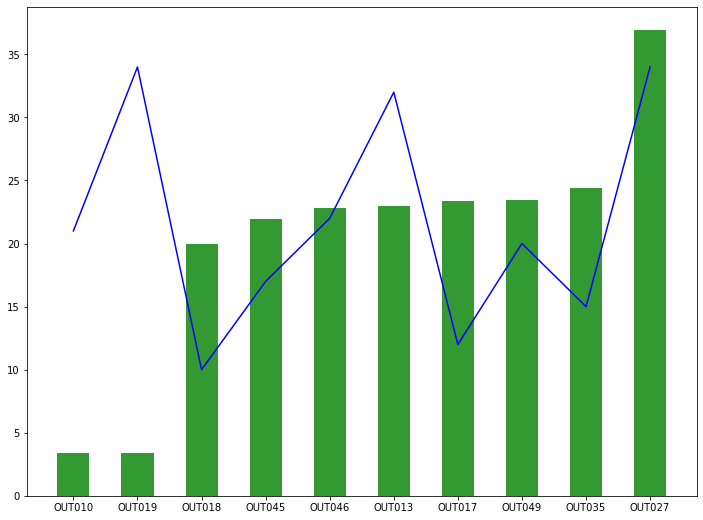

In [39]:
plt.figure(figsize=(12,9))

plt.plot(df_out.index, df_out.Outlet_Age, "-b", label="Average Outlet Sales")
plt.bar(df_out.index, df_out.Item_Outlet_Sales , width=0.5,alpha=0.8, color='green', label="Average percipitation mm", )

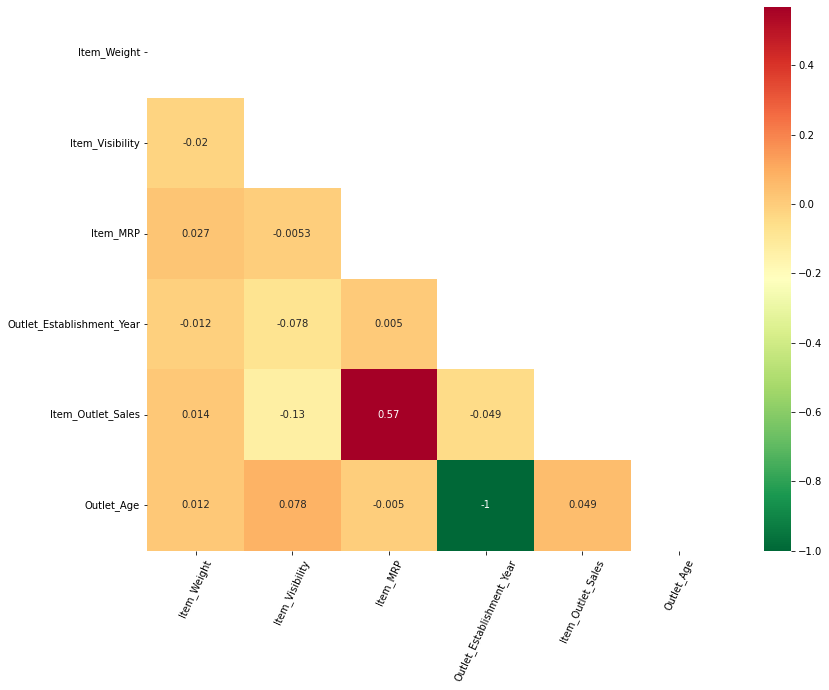

In [40]:
### check colleration for all columns
train_corr = train.corr()
mask = np.triu(np.ones_like(train_corr,dtype=bool))

plt.figure(figsize=(13,10))
sns.heatmap(train_corr, cmap='RdYlGn_r', mask=mask , annot=True)
plt.xticks(rotation=65)
plt.show()

- there are no significant colleration with the sales except for the "Item_MRP" 

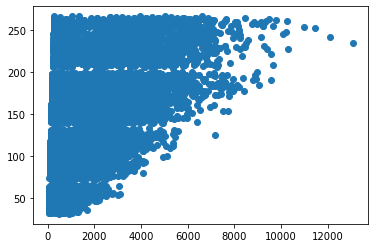

In [41]:
plt.scatter(train['Item_Outlet_Sales'], train['Item_MRP'])

In [42]:
upper = train['Item_Outlet_Sales'].quantile(0.95)
lower = train['Item_Outlet_Sales'].quantile(0.05)

train['Item_Outlet_Sales'] = train['Item_Outlet_Sales'].apply(lambda x: upper if x >upper 
                                                              else(lower if x < lower else x))

<AxesSubplot:ylabel='Item_Outlet_Sales'>

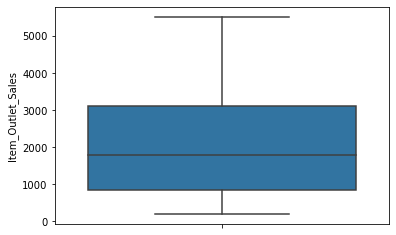

In [43]:
sns.boxplot(y='Item_Outlet_Sales',data=train)

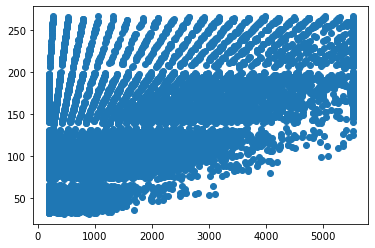

In [44]:
plt.scatter(train['Item_Outlet_Sales'], train['Item_MRP'])

# DATA EXPLORATION

In [45]:
for i in train.columns:
    print(i)
    print(train[i].value_counts())
    print("*********************\n")

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
*********************

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64
*********************

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
*********************

Item_Visibility
0.066132    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
*********************

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dair

===========================

In [46]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].apply(lambda x: "Regular" if x =='reg' or x == 'Regular' else 'Low Fat')

In [47]:
## item identifier classification
train['Item_Identifier'].str[:2].value_counts()



FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [78]:
train['Item_ID_Type']=train['Item_Identifier'].apply(lambda x: "Food" if x[:2] =='FD'else( "Drink" if x[:2]=='DR' else "Non-Consumable") )
train['Item_ID_Type'].value_counts()

TypeError: 'int' object is not subscriptable

In [48]:
#train.drop(columns=['Outlet_Establishment_Year','Item_Type'], inplace=True)

In [49]:
lencod = LabelEncoder()
ids = ['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_ID_Type']
for i in ids:
    train[i]=lencod.fit_transform(train[i])
train

KeyError: 'Item_ID_Type'

In [50]:
lb = OneHotEncoder()

cat_cols = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_ID_Type']



In [51]:
cat_cols

['Item_Fat_Content',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_ID_Type']

In [52]:
train = pd.get_dummies(train,columns = cat_cols)
    
# train.info()

KeyError: "['Item_ID_Type'] not in index"

TypeError: 'int' object is not subscriptable

In [54]:
model_scores = sorted([lrg_rmse_scores.mean(), tree_rmse_scores.mean(), forest_rmse_scores.mean()])
plt.figure(figsize=(13,10))


sns.set_style("darkgrid")
sns.barplot(x=['Linear Regression','Decision Tree Regressor','Random Forest Regressor'],y=model_scores,)

NameError: name 'lrg_rmse_scores' is not defined

In [55]:
y_pred_forest = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred_forest)
forest_rmse = np.sqrt(forest_mse)

print(f"Root Mean Squared Error: {forest_rmse}")

NameError: name 'forest_reg' is not defined

In [56]:
# get the scores validation using cross-validation
forest_scores = cross_val_score(forest_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
# scores for RandomForestRegressor
display_scores(forest_rmse_scores)

NameError: name 'forest_reg' is not defined

In [57]:
### first we will scaling the test data
scaler = StandardScaler()
scaler.fit(mod_test)
stnd_test = scaler.transform(mod_test)
stnd_test = pd.DataFrame(data =stnd_test, columns=mod_test.columns )


NameError: name 'mod_test' is not defined

In [58]:
y = train['Item_Outlet_Sales'].copy()
X = train.drop(columns='Item_Outlet_Sales')

### first will split train to 4 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

X_train.shape , y_train.shape

((5710, 12), (5710,))

In [72]:
lg = LinearRegression()

lg.fit(X_train, y_train)

ValueError: could not convert string to float: 'Snack Foods'

In [60]:
#checking the score
print(f"Linear Regression Score: {lg.score(X_train, y_train)}")



ValueError: could not convert string to float: 'Snack Foods'

In [61]:

y_pred = lg.predict(X_test)
y_pred



ValueError: could not convert string to float: 'Canned'

In [ ]:
y_test

In [62]:


# checking the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Squared Error for Regression: {mse}")
print(f"Root Mean Squared Error: {rmse}")



NameError: name 'y_pred' is not defined



Mean Squared Error for Regression: 977083.2100553424
Root Mean Squared Error: 988.4751944562607

well, is not a satisfying error but the range of median values of set item range between 850 to 3100.

    so this model need to be adjusted by standerizing the numerical columns using Standerization



In [63]:
forest_reg = RandomForestRegressor()

forest_reg.fit(X_train, y_train)

#checking score
print(f"score of Random Forest Regressor model: {forest_reg.score(X_train, y_train)}")

ValueError: could not convert string to float: 'Snack Foods'

In [64]:
y_pred_forest = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred_forest)
forest_rmse = np.sqrt(forest_mse)

print(f"Root Mean Squared Error: {forest_rmse}")

ValueError: could not convert string to float: 'Canned'


- the error of linear regression model still the lowest between the other models.

    however that, i will use Cross Validation with 10 folds to check these scores



In [65]:
lrg_scores = cross_val_score(lg, X_train, y_train,scoring ="neg_mean_squared_error", cv=10)
lrg_rmse_scores = np.sqrt(-lrg_scores)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 648, in fit
    X, y = self._validate_data(
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\madhu\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 102, in asarray
    return array(a, dtype, copy=False, order=order)
  File "C:\Users\madhu\anaconda3\lib\site-packages\pandas\core\generic.py", line 1993, in __array__
    return np.asarray(self._values, dtype=dtype)
  File "C:\Users\madhu\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 102, in asarray
    return array(a, dtype, copy=False, order=order)
ValueError: could not convert string to float: 'Meat'

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 648, in fit
    X, y = self._validate_data(
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\madhu\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 102, in asarray
    return array(a, dtype, copy=False, order=order)
  File "C:\Users\madhu\anaconda3\lib\site-packages\pandas\core\generic.py", line 1993, in __array__
    return np.asarray(self._values, dtype=dtype)
  File "C:\Users\madhu\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 102, in asarray
    return array(a, dtype, copy=False, order=order)
ValueError: could not convert string to float: 'Snack Foods'


In [66]:
tree_scores = cross_val_score(tree_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

NameError: name 'tree_reg' is not defined

In [67]:


def display_scores(scores):
    print("Scores: ", scores)
    print("\nMean: ", scores.mean())
    print("Standard deviation: ", scores.std())



In [68]:


#showing scores of linear regression model
display_scores(lrg_rmse_scores)



NameError: name 'lrg_rmse_scores' is not defined

In [69]:
# get the scores validation using cross-validation
forest_scores = cross_val_score(forest_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
# scores for RandomForestRegressor
display_scores(forest_rmse_scores)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\madhu\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 102, in asarray
    return array(a, dtype, copy=False, order=order)
  File "C:\Users\madhu\anaconda3\lib\site-packages\pandas\core\generic.py", line 1993, in __array__
    return np.asarray(self._values, dtype=dtype)
  File "C:\Users\madhu\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 102, in asarray
    return array(a, dtype, copy=False, order=order)
ValueError: could not convert string to float: 'Meat'

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\madhu\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 102, in asarray
    return array(a, dtype, copy=False, order=order)
  File "C:\Users\madhu\anaconda3\lib\site-packages\pandas\core\generic.py", line 1993, in __array__
    return np.asarray(self._values, dtype=dtype)
  File "C:\Users\madhu\anaconda3\lib\site-packages\numpy\core\_asarray.py", line 102, in asarray
    return array(a, dtype, copy=False, order=order)
ValueError: could not convert string to float: 'Snack Foods'


In [ ]:
### first we will scaling the test data
scaler = StandardScaler()
scaler.fit(mod_test)
stnd_test = scaler.transform(mod_test)
stnd_test = pd.DataFrame(data =stnd_test, columns=mod_test.columns )

In [ ]:
##with mod_test data
predicted = lg.predict(stnd_test)

predicted

In [70]:
stnd_test

NameError: name 'stnd_test' is not defined

In [71]:
model_scores = sorted([lrg_rmse_scores.mean(), forest_rmse_scores.mean()])
plt.figure(figsize=(13,10))


sns.set_style("darkgrid")
sns.barplot(x=['Linear Regression','Random Forest Regressor'],y=model_scores,)

NameError: name 'lrg_rmse_scores' is not defined


Summary

    we managed to build a Linear Regression model with
        Score: 0.58,
        Root Mean Squared Error : 1002.14

